# notebook description
This notebook is similar to the test_from_macaco.ipynb, but the methods are built inside the notebook. It is a better alternative to prototype new methods.

# build methods

In [15]:
%load_ext autoreload
%reload_ext autoreload
from dfbuild import *
import matplotlib.pyplot as plt

class dataframe():
    def __init__(self,initializer=None):
        self.df      = dfbuild()
        self.columns = {}
        self.dimensions   = [0,0]
        self.indexes = []

        if initializer != None:
            for col in initializer:
                self.insert(str(col), initializer[col])

    def insert(self,column,  array_values):
        for col_type in ['int', 'dbl']:
            if col_type == 'dbl':
                inst_type = '(int,float)'
            else: inst_type = col_type
            
            if all(isinstance(x, eval(inst_type)) for x in array_values):
                eval('self.df.insertCol{}(column,  array_values)'.format(col_type[0].upper()+col_type[1:]))
                self.columns[column] = col_type
        
        col_type = 'str'
        if any(isinstance(x, eval(col_type)) for x in array_values):
            eval('self.df.insertCol{}(column,  array_values)'.format(col_type[0].upper()+col_type[1:]))
            self.columns[column]  = col_type
            
        if self.dimensions[0] == 0 and self.dimensions[1] == 0:
            self.dimensions[0] = len(array_values)
        self.dimensions[1] = self.dimensions[1] + 1

    def remove(self,column):
        for col_type in ['int', 'dbl', 'str']:
            if self.columns[column] == col_type:
                eval('self.df.removeCol{}(column,  [])'.format(col_type[0].upper()+col_type[1:]))
                self.columns.pop(column)
                self.dimensions[1] = self.dimensions[1] - 1
                break

    def toIndxCol(self, column):
        for col_type in ['int', 'dbl', 'str']:
            if self.columns[column] == col_type:
                eval('self.df.toIndxCol{}(column, [])'.format(col_type[0].upper()+col_type[1:]))
                if column not in self.indexes:
                    self.indexes.append(column)
                
    def tolist(self,column):
        for col_type in ['int', 'dbl', 'str']:
            if self.columns[column] == col_type:
                column_tolist = eval('self.df.locateCol{}(column)'.format(col_type[0].upper()+col_type[1:]))
                return column_tolist

    def locateCel(self,column,  loc_row):
        loc_rows = []
        if type(loc_row) != int:
            loc_rows = list(loc_row)
        else:
            loc_rows.append(loc_row)
        for col_type in ['int', 'dbl', 'str']:
            if self.columns[column] == col_type:
                cel_val = eval('self.df.locateRow{}(column, loc_rows)'.format(col_type[0].upper()+col_type[1:]))
                return cel_val

    def locateRow(self, loc_row):
        row_query = {}
        for c in self.columns:
            row_query[c] = []
        for column in self.columns:
            row_query[column].append(self.locateCel(column,  loc_row))
        return row_query    

    #not working
    def insertRow(self,value):
        num_loc_rows = [len(value[i]) for i in value][0]
        for column in self.columns:
            for col_type in ['int', 'dbl', 'str']:
                if self.columns[column] == col_type:
                    eval('self.df.insertRow{}(column, value[column])'.format(col_type[0].upper()+col_type[1:]))
        self.dimensions[0] += num_loc_rows

    #not working
    def Query_Valor(self, val,column):
        for col_type in ['int', 'dbl', 'str']:
            if self.columns[column] == col_type:
                return eval('self.df.GetNodeRows{}(column, val)'.format(col_type[0].upper()+col_type[1:]))

    def show(self):
        data_all = self.locateRow(range(0,self.dimensions[0]))
        print ('|      {:<10}'.format('index'), sep='', end =" ")
        for header in data_all.keys():
            print ('|      {:<10}'.format(header), sep='', end =" ")
        print(end ="\n")
        for i in range(len(data_all.items())+1):
            print('|      {:<10}'.format(' '), sep='', end =" ")
        print(end ="\n")
        for i in range(len(data_all.items())+1):
            print('|      {:<10}'.format(i), end =" ")
            for v in data_all.values():
                print('|      {:<10}'.format(v[0][i]), end =" ")
            print(end ="\n")  
            
    def plot(self, a, b, how="lineplot"):
        if self.columns[a] in ['int', 'dbl'] and self.columns[b] in ['int', 'dbl']:
            list_a = self.tolist(a)
            list_b = self.tolist(b)
            if how == 'lineplot':
                plt.plot(list_a,list_b)
            elif how == 'scatterplot':
                plt.scatter(list_a,list_b)
            else:
                raise ValueError('Please choose a valid plot type.')
        else:
            raise ValueError('Some of your selected columns has string type.')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# show methods

In [16]:
print(dir(dfbuild)[:3])
print(dir(dfbuild)[-20:])

['GetNodeRowsDbl', 'GetNodeRowsInt', 'GetNodeRowsStr']
['__weakref__', 'col_int', 'insertColDbl', 'insertColInt', 'insertColStr', 'insertRowDbl', 'insertRowInt', 'insertRowStr', 'locateColDbl', 'locateColInt', 'locateColStr', 'locateRowDbl', 'locateRowInt', 'locateRowStr', 'removeColDbl', 'removeColInt', 'removeColStr', 'toIndxColDbl', 'toIndxColInt', 'toIndxColStr']


# test empty data initializer

In [17]:
df = dataframe()
df.columns

{}

In [18]:
df.insert('0', ['alpha','beta','gama','delta'])
df.insert('1' ,[1.1,3.3,2.2,4.4])

In [19]:
df.columns

{'0': 'str', '1': 'dbl'}

In [20]:
df.show()

|      index      |      0          |      1          
|                 |                 |                 
|      0          |      alpha      |      1.1        
|      1          |      beta       |      3.3        
|      2          |      gama       |      2.2        


# test column insertion

In [21]:
initial_columns = {'0': [1, 2, 3, 4], '1': ['1', '2', '3', '4'], '2': ['alpha','beta','gama','delta']}
df = dataframe(initial_columns)
#df = dataframe()
df.insert('1', [1.1,3.3,2.2,4.4])

In [22]:
df.show()

|      index      |      0          |      1          |      2          
|                 |                 |                 |                 
|      0          |      1.0        |      1.1        |      alpha      
|      1          |      2.0        |      3.3        |      beta       
|      2          |      3.0        |      2.2        |      gama       
|      3          |      4.0        |      4.4        |      delta      


# draw graphic of 2 columns

test with standard mode (lineplot)

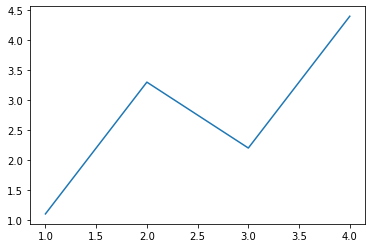

In [23]:
df.plot('0', '1')

test with scatterplot mode

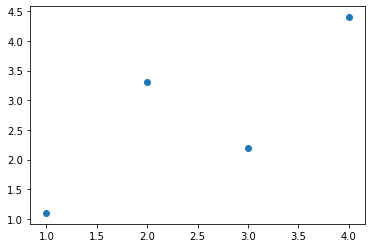

In [10]:
df.plot('0', '1', how='scatterplot')

output error if tries to plot list of strings 

df.plot('0', '2')

# show data from columns

In [11]:
df.tolist('0')

[1.0, 2.0, 3.0, 4.0]

In [12]:
df.tolist('1')

[1.1, 3.3, 2.2, 4.4]

In [13]:
df.tolist('2')

['alpha', 'beta', 'gama', 'delta']

# insert row at end
broken

# show data

In [14]:
print(df.locateCel('0', [2,3]))
print(df.locateCel('1',0))
print(df.locateCel('2',[2,3]))
print(df.locateRow([0,1]))

[3.0, 4.0]
[1.1]
['gama', 'delta']
{'0': [[1.0, 2.0]], '1': [[1.1, 3.3]], '2': [['alpha', 'beta']]}


In [15]:
df.show()

|      index      |      0          |      1          |      2          
|                 |                 |                 |                 
|      0          |      1.0        |      1.1        |      alpha      
|      1          |      2.0        |      3.3        |      beta       
|      2          |      3.0        |      2.2        |      gama       
|      3          |      4.0        |      4.4        |      delta      


# index

In [28]:
for column in ['0', '1']:
    df.toIndxCol(column)
#df.toIndxCol('0')
#df.toIndxCol('1')
#df.toIndxCol('2')

In [29]:
df.indexes

['0', '1']

# queries
broken

# test removal

In [18]:
df.dimensions

[4, 4]

In [19]:
df.remove('0')

In [20]:
df.columns

{'1': 'dbl', '2': 'str'}

In [21]:
df.dimensions

[4, 3]

# drafts